Merkel-Modell am 2020-09-29

https://twitter.com/RegSprecher/status/1310996763810111489

In [3]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading infection numbers of Robert Koch-Institut

In [4]:
df = pd.read_excel(
    io=pathlib.Path("Nowcasting_Zahlen_rki.xlsx"),
    sheet_name="Nowcast_R",
    index_col=0
)
df

,Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung),Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glättung),Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glättung),Punktschätzer der Anzahl Neuerkrankungen,Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Punktschätzer der Reproduktionszahl R,Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Punktschätzer des 7-Tage-R Wertes,Untere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes,Obere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes
Datum des Erkrankungsbeginns,,,,,,,,,,,,
2020-03-02,303,288,317,225,212,238,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,321,303,338,261,246,275,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,450,433,470,326,310,341,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,501,481,521,394,376,411,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,759,733,781,508,487,527,2.26,2.18,2.35,2.34,2.30,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,2145,1679,2499,2082,1747,2377,1.19,1.09,1.30,1.10,1.03,1.16
2020-09-26,1880,1393,2366,2028,1634,2398,1.10,0.99,1.22,1.10,1.03,1.18
2020-09-27,1921,1334,2501,1992,1528,2431,1.00,0.87,1.14,1.11,1.01,1.21


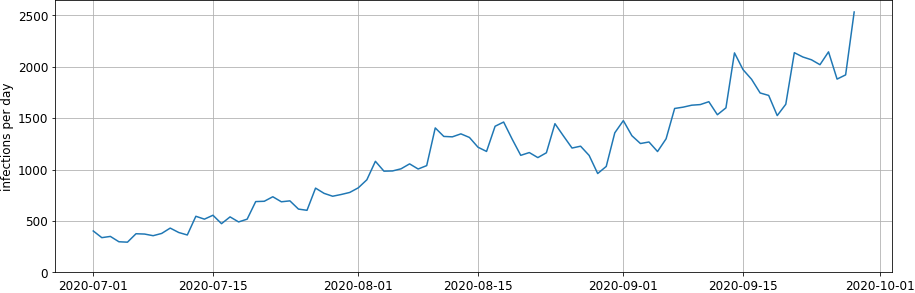

In [46]:
ax = plt.figure(figsize=(15, 5))
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'), df['Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung)'])
plt.grid()
plt.ylim(0)
plt.ylabel('infections per day')
plt.show()

## Consider time between 2020-07-01 and 2020-09-29

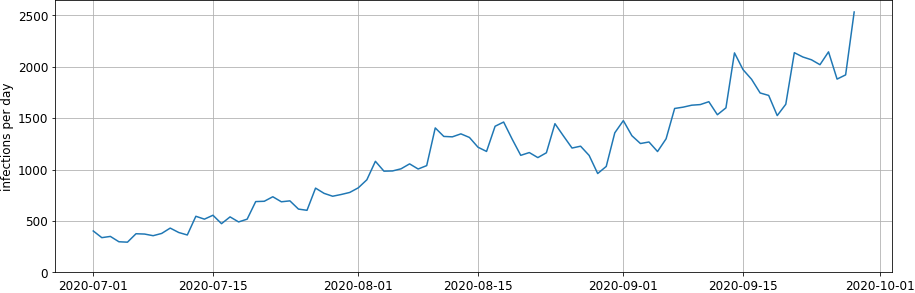

In [47]:
# Merkel proposed her model on 2020-09-29, meaning that infections on 2020-09-28 is the last number she could've includeded
df = df.query("'2020-06-30' < index < '2020-09-29'")
ax = plt.figure(figsize=(15, 5))
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'), df['Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung)'])
plt.grid()
plt.ylim(0)
plt.ylabel('infections per day')
plt.show()

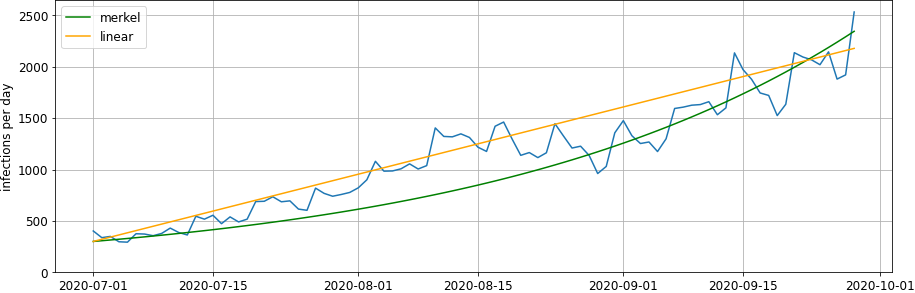

In [48]:
def merkel_exponential(x):
    return 300 * 2**(float(1) / 30 * x)

def linear(x, n_days):
    return (2200-300) / n_days * x + 300

n_days = len(df)
y_merkel = merkel_exponential(np.arange(n_days))
y_linear = linear(np.arange(n_days), n_days)

ax = plt.figure(figsize=(15, 5))
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'), df['Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung)'])
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'), y_merkel,
         color="green",
         label="merkel")
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'), y_linear,
         color="orange",
         label="linear")
plt.grid()
plt.ylim(0)
plt.ylabel('infections per day')
plt.legend()
plt.show()

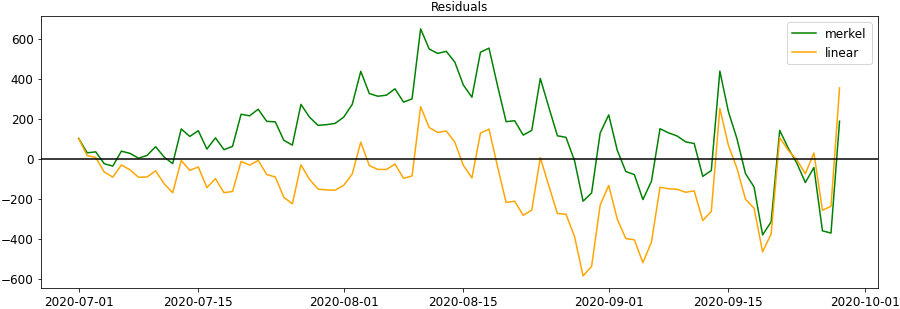

In [50]:
residual_merkel = df['Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung)'] - y_merkel
residual_linear = df['Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung)'] - y_linear

plt.figure(figsize=(15, 5))
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'),
         residual_merkel,
         color="green",
         label="merkel")
plt.plot(df.index.get_level_values('Datum des Erkrankungsbeginns'),
         residual_linear,
         color="orange",
         label="linear")
plt.axhline(0, color="black")
plt.title("Residuals")
plt.legend()
plt.show()

In [52]:
SS_merkel = np.sum(np.square(residual_merkel))
SS_linear = np.sum(np.square(residual_linear))
print(f"Merkel residuals Sum of squares: {SS_merkel}")
print(f"Linear residuals Sum of squares: {SS_linear}")

Merkel residuals Sum of squares: 5421444.731130479
Linear residuals Sum of squares: 3796143.851851852
